In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Otsu

In [7]:
def otsu_threshold(image):
    # Calcular histograma
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

    # Normalizar histograma (probabilidad de cada nivel de gris)
    hist = hist.astype(np.float32) / hist.sum()

    # Variables auxiliares
    best_threshold = 0
    max_variance = 0

    # Probabilidades acumuladas y medias acumuladas
    P1 = np.cumsum(hist)  # Suma acumulada de probabilidades
    m1 = np.cumsum(hist * np.arange(256))  # Media acumulada

    for t in range(1, 256):  # Iterar sobre umbrales posibles (1 a 255)
        if P1[t] == 0 or P1[t] == 1:
            continue  # Evitar divisiones por cero

        # Media de las dos clases
        mean_back = m1[t] / P1[t]  # Media de fondo
        mean_fore = (m1[-1] - m1[t]) / (1 - P1[t])  # Media de objeto

        # Varianza entre-clases
        variance_between = P1[t] * (1 - P1[t]) * (mean_back - mean_fore) ** 2

        # Buscar el umbral que maximiza la varianza entre-clases
        if variance_between > max_variance:
            max_variance = variance_between
            best_threshold = t

    return best_threshold

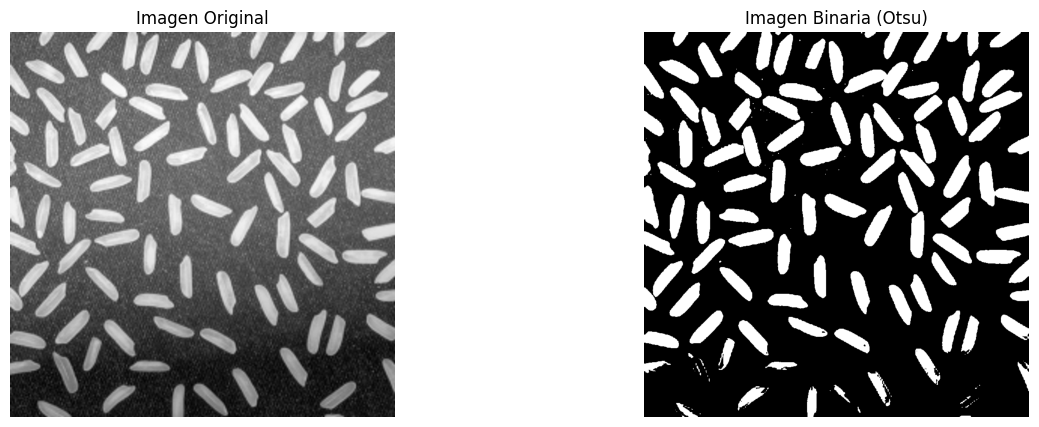

In [8]:
# Cargar imagen en escala de grises
image = cv2.imread('images/rice.jpg', cv2.IMREAD_GRAYSCALE)

# Obtener umbral de Otsu
threshold = otsu_threshold(image)

# Aplicar umbralización
binary_image = (image > threshold).astype(np.uint8) * 255

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Imagen Binaria (Otsu)')
axes[1].axis('off')

plt.show()

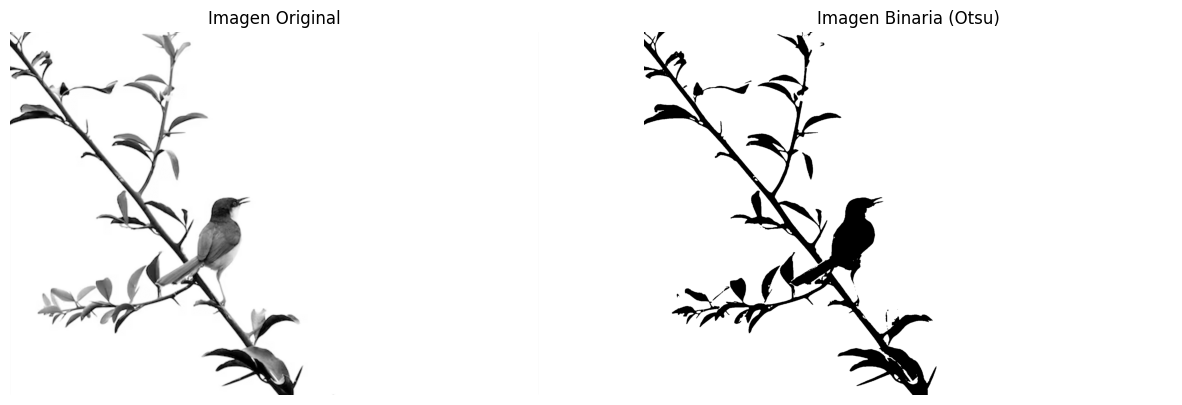

In [18]:
# Cargar imagen en escala de grises
image = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE)

# Obtener umbral de Otsu
threshold = otsu_threshold(image)

# Aplicar umbralización
binary_image = (image > threshold).astype(np.uint8) * 255

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Imagen Binaria (Otsu)')
axes[1].axis('off')

plt.show()

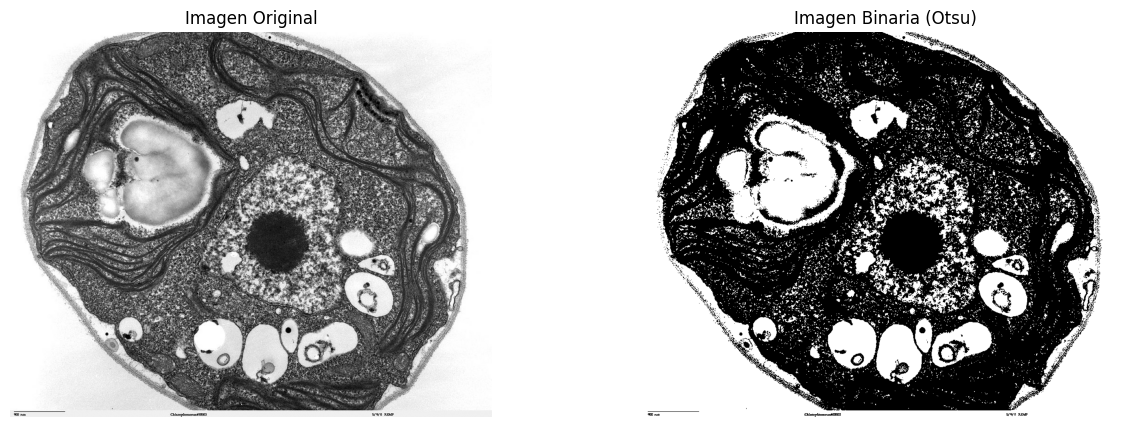

In [19]:
# Cargar imagen en escala de grises
image = cv2.imread('images/cell.jpg', cv2.IMREAD_GRAYSCALE)

# Obtener umbral de Otsu
threshold = otsu_threshold(image)

# Aplicar umbralización
binary_image = (image > threshold).astype(np.uint8) * 255

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Imagen Binaria (Otsu)')
axes[1].axis('off')

plt.show()

## Kmeans

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def kmeans_segmentation(image, max_iters=10, tol=1e-4):
    # Aplanar la imagen para trabajar con una lista de intensidades
    pixels = image.flatten().astype(np.float32)

    # Inicializar centroides aleatoriamente en el rango de intensidades
    centroids = np.random.choice(pixels, 2, replace=False)

    for _ in range(max_iters):
        # Asignar cada píxel al cluster más cercano
        distances = np.abs(pixels[:, None] - centroids)  # Distancia a cada centroide
        labels = np.argmin(distances, axis=1)  # 0 o 1 según el centroide más cercano

        # Recalcular centroides como el promedio de cada grupo
        new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])

        # Condición de convergencia (si los centroides no cambian significativamente)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    # Crear imagen binaria según los labels obtenidos
    binary_image = (labels.reshape(image.shape) * 255).astype(np.uint8)

    return binary_image

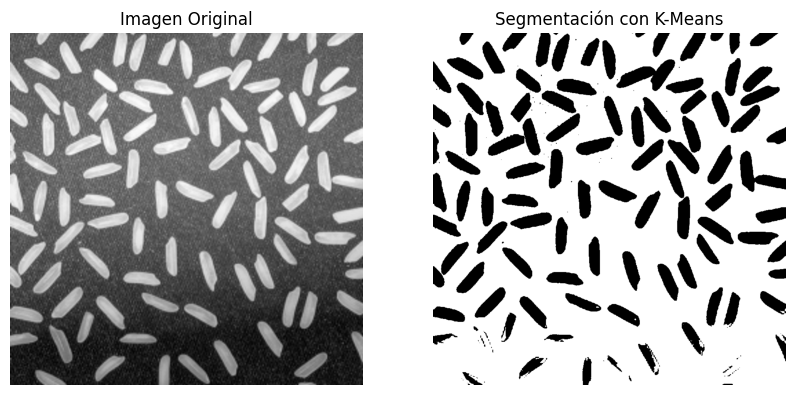

In [17]:
# Cargar imagen en escala de grises
image = cv2.imread('images/rice.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means
binary_image = kmeans_segmentation(image)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means')
axes[1].axis('off')

plt.show()

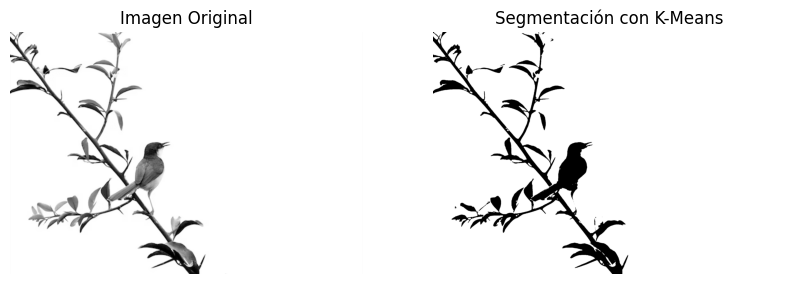

In [16]:
# Cargar imagen en escala de grises
image = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means
binary_image = kmeans_segmentation(image)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means')
axes[1].axis('off')

plt.show()

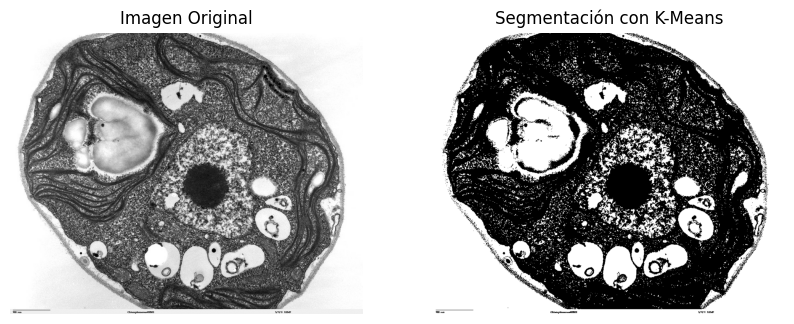

In [20]:
# Cargar imagen en escala de grises
image = cv2.imread('images/cell.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means
binary_image = kmeans_segmentation(image)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means')
axes[1].axis('off')

plt.show()

## Kmeans local

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def local_kmeans_segmentation(image, block_size=50, max_iters=10, tol=1e-4):
    """
    Segmentación binaria usando K-Means local.
    
    Parámetros:
        image: Imagen en escala de grises.
        block_size: Tamaño de los bloques en los que se aplica K-Means.
        max_iters: Número máximo de iteraciones.
        tol: Tolerancia para la convergencia de los centroides.
    
    Retorna:
        segmented_image: Imagen segmentada con K-Means en bloques.
    """
    h, w = image.shape
    segmented_image = np.zeros_like(image, dtype=np.uint8)

    # Recorremos la imagen en bloques
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            # Extraer bloque
            block = image[y:y+block_size, x:x+block_size]
            pixels = block.flatten().astype(np.float32)

            # Evitar bloques vacíos
            if len(pixels) == 0:
                continue

            # Inicializar centroides aleatorios
            centroids = np.random.choice(pixels, 2, replace=False)

            for _ in range(max_iters):
                # Asignar cada píxel al cluster más cercano
                distances = np.abs(pixels[:, None] - centroids)
                labels = np.argmin(distances, axis=1)

                # Recalcular centroides como el promedio de cada grupo
                new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])

                # Condición de convergencia
                if np.linalg.norm(new_centroids - centroids) < tol:
                    break
                centroids = new_centroids

            # Crear imagen binaria del bloque
            segmented_block = (labels.reshape(block.shape) * 255).astype(np.uint8)
            segmented_image[y:y+block_size, x:x+block_size] = segmented_block

    return segmented_image

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_65531/4155724066.py:41: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])


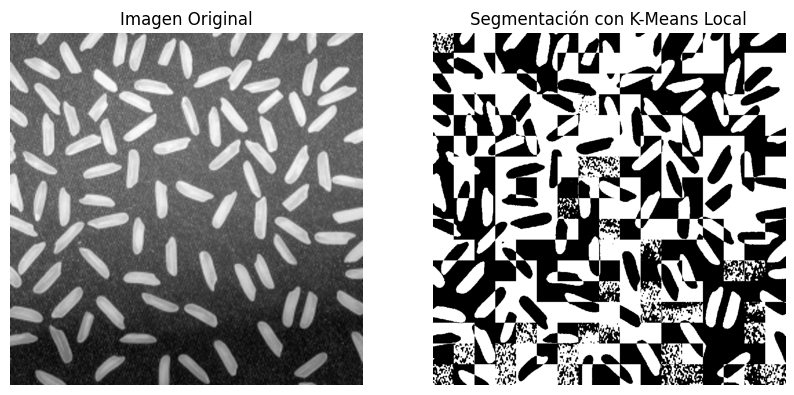

In [11]:
# Cargar imagen en escala de grises
image = cv2.imread('images/rice.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means local
binary_image = local_kmeans_segmentation(image, block_size=50)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means Local')
axes[1].axis('off')

plt.show()

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_65531/4155724066.py:41: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])


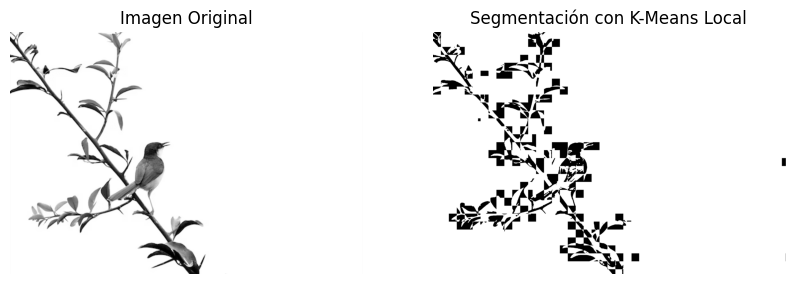

In [21]:
# Cargar imagen en escala de grises
image = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means local
binary_image = local_kmeans_segmentation(image, block_size=50)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means Local')
axes[1].axis('off')

plt.show()

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_65531/4155724066.py:41: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([pixels[labels == i].mean() for i in range(2)])


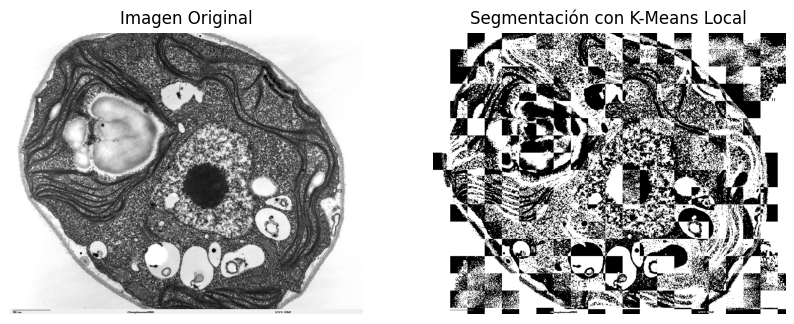

In [23]:
# Cargar imagen en escala de grises
image = cv2.imread('images/cell.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar segmentación con K-Means local
binary_image = local_kmeans_segmentation(image, block_size=50)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Segmentación con K-Means Local')
axes[1].axis('off')

plt.show()

## Conclusión
En general, el algoritmo de Otsu suele ofrecer los resultados más consistentes y confiables en la segmentación binaria de imágenes. Esto se debe a que calcula un umbral óptimo de forma determinista, minimizando la varianza intra-clase.

Por otro lado, K-Means, al ser un algoritmo estocástico, puede generar resultados menos estables, ya que la posición inicial de los centroides influye en el umbral obtenido, lo que a veces resulta en un umbral demasiado alto o demasiado bajo.

La versión local de K-Means mostró el peor desempeño, ya que, aunque logra una buena segmentación dentro de cada bloque, la imagen completa suele presentar discontinuidades y pérdida de calidad debido a la falta de coherencia entre bloques adyacentes.